# Approximation of the DW resistance coefficients

The DW approximation uses a convoluted expression for the resistance factor givn by:

$$
A = 0.0252 \, f(\epsilon, d, q) \, d^{-5} \, L
$$

where $d$ and $L$ are the diameter and length of the pipe. The friction factor $f(\epsilon, d, q)$ is given by a non-linear function that depends on the friction coefficient, $\epsilon$ as well as the diameter of the pipe and the flow rate. This non-linear function also depends also on the flow regime.

This form is not well suited for a QUBO formulation of the hydraulics equations as it is not a polynomial expression. 

We consider here only the fully turbulent regime, where $f(\epsilon, d, q)$ is usually computed by the Swamee-Jain (SJ) approximation to the Colebrook-White equation. While very accurate this approximation is to complicated to use directly in a QUBO reformulation. We therefore use here a simpler quadratic interpolation of the Colebrook-White equation:

$$
f(\epsilon, d, q) = \alpha(\epsilon, d) + \beta(\epsilon, d) |q|^{-1} + \gamma(\epsilon, d) |q|^{-2}
$$

were the fitting coefficients $\alpha$, $\beta$ and $\gamma$ can either be computed on the fly or tabulated. While less accurate that the full SJ approximation, the quadratic approximation stays close to it for a wide range of parameters. This approach leads to acceptable results for our current purpose. \\


## Example

We present here the results of the this approximation

In [1]:
from wntr_quantum.sim.models.darcy_weisbach_fit import * 
import matplotlib.pyplot as plt 
from matplotlib import ticker

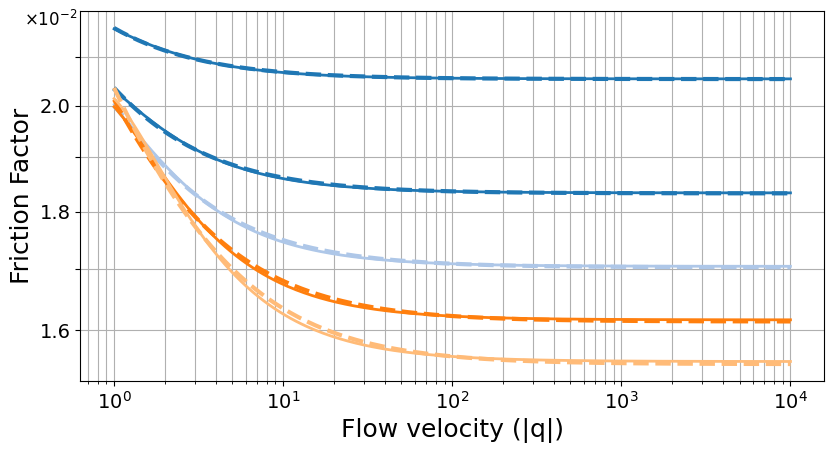

In [4]:
# define the parameters of the coefficents
roughness = 0.5 * 1e-3
DIAMS = np.arange(5, 20, 3) / 12

BASELINE = []
APPROX = []

# loop over the diameters
for d in DIAMS:

    # call the fit function provided by wntr_quantum
    res, approx, baseline, qval = dw_fit(
        roughness=roughness, diameter=d, plot=False, convert_to_us_unit=False, return_all_data=True
    )
    BASELINE.append(baseline)
    APPROX.append(approx)

# define color palette
colors = plt.cm.tab20(np.linspace(0, 1, 24))

# plot the approximation
fig = plt.figure(figsize = plt.figaspect(0.5))
ax1 = fig.add_subplot(111)

i = 0
for bl, ap in zip(BASELINE, APPROX):
    ax1.loglog(qval, bl, "--", lw = 3, c=colors[i])
    ax1.loglog(qval, ap, "-", lw = 2, c=colors[i])
    i += 1

ax1.grid(visible=True, which="both")
ax1.set_xlabel("Flow velocity (|q|)", fontsize=18)
ax1.set_ylabel("Friction Factor", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(ticks=[1.6*1e-2, 1.7*1e-2, 1.8*1e-2, 1.9*1e-2,  2.0*1e-2, 2.1*1e-2], labels=['1.6', '', '1.8', '', '2.0', ''], fontsize=14)
ax1.annotate(r'$\times$10$^{%i}$'%(-2), fontsize=12,
             xy=(-.075, .96), xycoords='axes fraction')

plt.show()